In [1]:
import twitter
import json
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
from collections import Counter
from prettytable import PrettyTable
import operator
from nltk.tokenize import word_tokenize, TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
from textblob import TextBlob
import json
import numpy as np
from numpy import array

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
def oauth_login():
    CONSUMER_KEY = ''
    CONSUMER_SECRET = ''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

api=oauth_login()

In [3]:
def twitter_search(api, q, **kw):
    rez = api.search.tweets(q='#Lakers -filter:links',count=100,tweet_mode = 'extended')
    results=rez['statuses']
    for i in range(99):
        print("Favorite count", results[i]['favorite_count'])
        print("Retweet count",results[i]['retweet_count'])
        print("Content",results[i]['full_text'])
        print("\n")
    return rez
q='#Lakers -filter:links'
text = twitter_search(api,q)


# write your code here (print and save... etc)

with open('results1.json','a') as f: #saving file as json
    f.write(json.dumps(text))
    


Favorite count 0
Retweet count 0
Content Putain mais c’est un sketch c’est Lakers ! 
Limite c’était mieux il y a 2-3 ans c’est pour dire...
Et puis trader moi l’autre tocard qui depuis qu’il est arrivé c’est un cauchemar. #Lakers


Favorite count 0
Retweet count 8
Content RT @LakerStandard: In more #Lakers news, the Celtics have lost on every single coin flip today on draft picks


Favorite count 0
Retweet count 0
Content If the #Lakers get Tyronn Lue as the head coach I’ll be so fucking pissed


Favorite count 0
Retweet count 0
Content BREAKING NOW: Sources are telling me that Jeanie Buss has contacted Kobe Bryant yes kobebryant to become president of basketball operations of the Los Angeles Lakers alongside long time friend and ex agent Rob Pelinka, sources tell us. WOW!!! #Lakers


Favorite count 0
Retweet count 0
Content #Lakers in one week:
🏀 #MagicJohnson resigns as team president 
🏀#LukeWalton out as coach of the Lakers


Favorite count 0
Retweet count 1
Content RT @LeBryanJames

#### Extract full_text

In [4]:
bank = []
for i in range(99):
    bank.append(text['statuses'][i]["full_text"]) #get full_text for tweets that exceed 240 chars

In [5]:
bank

['Putain mais c’est un sketch c’est Lakers ! \nLimite c’était mieux il y a 2-3 ans c’est pour dire...\nEt puis trader moi l’autre tocard qui depuis qu’il est arrivé c’est un cauchemar. #Lakers',
 'RT @LakerStandard: In more #Lakers news, the Celtics have lost on every single coin flip today on draft picks',
 'If the #Lakers get Tyronn Lue as the head coach I’ll be so fucking pissed',
 'BREAKING NOW: Sources are telling me that Jeanie Buss has contacted Kobe Bryant yes kobebryant to become president of basketball operations of the Los Angeles Lakers alongside long time friend and ex agent Rob Pelinka, sources tell us. WOW!!! #Lakers',
 '#Lakers in one week:\n🏀 #MagicJohnson resigns as team president \n🏀#LukeWalton out as coach of the Lakers',
 'RT @LeBryanJames23: The #Lakers are the Fyre Fest of the NBA!',
 "RT @BenOsaze: Luke Walton won't last two seasons under Magic/Pelinka. #Lakers \n#SaveThisTweet",
 '@kobebryant when you gonna come out and say your taking over @MagicJohnson place.

#### Extracting hashtags, displaying hashtag counter

In [6]:
hash1 = []
for i in bank:
    hash1.append((re.findall(r"(\#+[\w_]+)",i)))     #find all hashtags

hash1 = [x for x in hash1 if x != []]
hash1 = [hash.lower() for x in hash1 for hash in x]
count_all_hash = Counter()
count_all_hash.update(hash1)
count_all_hash   

Counter({'#lakers': 95,
         '#magicjohnson': 1,
         '#lukewalton': 6,
         '#savethistweet': 1,
         '#blackmamba': 1,
         '#myninja': 1,
         '#blackout': 1,
         '#goat': 1,
         '#pelinka': 1,
         '#lakeshow': 11,
         '#com3300': 1,
         '#nba': 8,
         '#lakersnation': 1,
         '#nbaextra': 2,
         '#freeagency': 1,
         '#big3': 1,
         '#shipwreck': 1,
         '#pelicans': 3,
         '#labron': 1,
         '#ripwalton': 1,
         '#business': 1,
         '#tylue': 2,
         '#lebronjames': 3,
         '#l4l': 1,
         '#bombers': 1,
         '#mightybombers': 1,
         '#davidgriffin': 1,
         '#ad': 1,
         '#lebron': 1,
         '#walton': 1,
         '#williams': 1,
         '#lue': 1,
         '#waltonfired': 1,
         '#who': 1,
         '#bringphilback': 1,
         '#lakerdrama': 1,
         '#help': 1,
         '#james': 1,
         '#phx': 1,
         '#kings': 1,
         '#isaidit'

In [7]:
pt = PrettyTable(['Hashtags', 'Counts'])
pt.align['Hashtags'] = 'l'
pt.align['Counts'] = 'r'
for row in count_all_hash.most_common():
    pt.add_row(row)
print (pt)

+----------------+--------+
| Hashtags       | Counts |
+----------------+--------+
| #lakers        |     95 |
| #lakeshow      |     11 |
| #nba           |      8 |
| #lukewalton    |      6 |
| #pelicans      |      3 |
| #lebronjames   |      3 |
| #nbaextra      |      2 |
| #tylue         |      2 |
| #magicjohnson  |      1 |
| #savethistweet |      1 |
| #blackmamba    |      1 |
| #myninja       |      1 |
| #blackout      |      1 |
| #goat          |      1 |
| #pelinka       |      1 |
| #com3300       |      1 |
| #lakersnation  |      1 |
| #freeagency    |      1 |
| #big3          |      1 |
| #shipwreck     |      1 |
| #labron        |      1 |
| #ripwalton     |      1 |
| #business      |      1 |
| #l4l           |      1 |
| #bombers       |      1 |
| #mightybombers |      1 |
| #davidgriffin  |      1 |
| #ad            |      1 |
| #lebron        |      1 |
| #walton        |      1 |
| #williams      |      1 |
| #lue           |      1 |
| #waltonfired   |  

#### Extracting emails, and cleaning our full_text

I remove hashtags, @users, words 2 characters or lower, non alpha characters (isalpha), and common stopwords, punctuation, and random characters that slipped through my filter. This cleaning process is subjective. 

In [8]:
email_at = []
for i in bank:
    email_at.append((re.findall(r"(\@+[\w_]+)",i)))
email_at = [x for x in email_at if x != []]
email_at = [at.lower() for x in email_at for at in x]
email_at

['@lakerstandard',
 '@lebryanjames23',
 '@benosaze',
 '@kobebryant',
 '@magicjohnson',
 '@lakerstandard',
 '@lakerstandard',
 '@dannygradio',
 '@benmaller',
 '@uhbroncofan',
 '@raider_rob24',
 '@eddieonfox',
 '@markjackson13',
 '@lakerstandard',
 '@wojespn',
 '@sedanoespn',
 '@espnlosangeles',
 '@lakerstandard',
 '@owennewkam',
 '@lakers',
 '@kobebryant',
 '@lakerstandard',
 '@lakers',
 '@lakers',
 '@jeaniebuss',
 '@lakerfilmroom',
 '@jeaniebuss',
 '@kylekuzma',
 '@ravewithravi',
 '@ralph_masonjr',
 '@moderntimeslb',
 '@michaeljduarte',
 '@dufrankman',
 '@jkdufresne',
 '@dufrankman',
 '@jkdufresne',
 '@jimenaofficial',
 '@ralph_masonjr',
 '@lakers',
 '@ralph_masonjr',
 '@bleacherreport',
 '@wojespn',
 '@dufrankman',
 '@jkdufresne',
 '@ralph_masonjr',
 '@kingjames',
 '@ralph_masonjr',
 '@michaeljduarte',
 '@ralph_masonjr',
 '@justbeliketom',
 '@timeoutsp_radio',
 '@jkdufresne14',
 '@drewdufresne11',
 '@jeaniebuss',
 '@ralph_masonjr',
 '@kingjames',
 '@tomerazarly',
 '@craigary',
 '@ryan

In [9]:
count_all = Counter()
stopw = stopwords.words('english') + list(string.punctuation) + [ 'iii'] + hash1 + email_at #filter
bank1 = []
for i in bank:
    porter=nltk.PorterStemmer()
    tokens = [stop for stop in TweetTokenizer().tokenize(i.lower()) if stop not in stopw]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if re.findall(r"(\w{3})",w) ]
    tokens = [porter.stem(w) for w in tokens]
    bank1.append(tokens)
    count_all.update(tokens)


In [10]:
pt = PrettyTable(['Words', 'Counts'])
pt.align['Words'] = 'l'
pt.align['Counts'] = 'r'
for row in count_all.most_common():
    pt.add_row(row)
print (pt)

+-------------+--------+
| Words       | Counts |
+-------------+--------+
| coach       |     34 |
| luke        |     32 |
| walton      |     24 |
| laker       |     20 |
| lebron      |     18 |
| get         |     15 |
| lue         |     15 |
| head        |     13 |
| magic       |     11 |
| pelinka     |     10 |
| hope        |     10 |
| news        |      9 |
| draft       |      9 |
| like        |      9 |
| pick        |      8 |
| buss        |      8 |
| klutch      |      8 |
| outta       |      8 |
| celtic      |      7 |
| lost        |      7 |
| everi       |      7 |
| singl       |      7 |
| coin        |      7 |
| flip        |      7 |
| today       |      7 |
| presid      |      7 |
| griffin     |      7 |
| way         |      7 |
| good        |      7 |
| est         |      6 |
| team        |      6 |
| david       |      6 |
| guy         |      6 |
| becom       |      5 |
| season      |      5 |
| want        |      5 |
| new         |      5 |


In [11]:
bank1 #how the individual tweets look like after cleaning

[['putain',
  'mai',
  'est',
  'sketch',
  'est',
  'laker',
  'limit',
  'était',
  'mieux',
  'an',
  'est',
  'pour',
  'dire',
  'pui',
  'trader',
  'moi',
  'autr',
  'tocard',
  'qui',
  'depui',
  'est',
  'arrivé',
  'est',
  'cauchemar'],
 ['news',
  'celtic',
  'lost',
  'everi',
  'singl',
  'coin',
  'flip',
  'today',
  'draft',
  'pick'],
 ['get', 'tyronn', 'lue', 'head', 'coach', 'fuck', 'piss'],
 ['break',
  'sourc',
  'tell',
  'jeani',
  'buss',
  'contact',
  'kobe',
  'bryant',
  'ye',
  'kobebry',
  'becom',
  'presid',
  'basketbal',
  'oper',
  'lo',
  'angel',
  'laker',
  'alongsid',
  'long',
  'time',
  'friend',
  'agent',
  'rob',
  'pelinka',
  'sourc',
  'tell',
  'wow'],
 ['one', 'week', 'resign', 'team', 'presid', 'coach', 'laker'],
 ['fyre', 'fest', 'nba'],
 ['luke', 'walton', 'last', 'two', 'season', 'magic', 'pelinka'],
 ['gonna',
  'come',
  'say',
  'take',
  'place',
  'ass',
  'regul',
  'make',
  'purpl',
  'gold',
  'great'],
 ['nobodi',
  'g

### WordCloud

In [12]:
words1 = [words for word in bank1 for words in word] #giant string of tokenized
str1 = ' '.join(words1)


(-0.5, 1199.5, 899.5, -0.5)

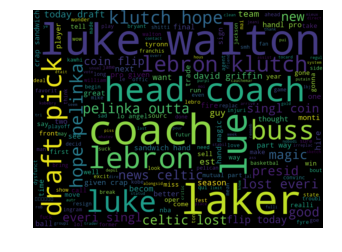

In [13]:
wordcloud = WordCloud(width = 1200,height = 900).generate((str1))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Problem 2: Live Streaming Tweets


In [15]:
#Ignore error it just keeps looking for more tweets with full_text

def oauth_login():
    CONSUMER_KEY = ''
    CONSUMER_SECRET = ''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = tweepy.auth.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    
    twitter_api = tweepy.API(auth,wait_on_rate_limit=True)
    return auth
api=oauth_login()

bank_stream = []
class MyListener(StreamListener):
    def __init__(self):
        super().__init__()
        self.counter = 0
        self.limit = 10
 
    def on_data(self, data):
        try:
            json_load = json.loads(data)

            text = {'text': json_load['retweeted_status']['extended_tweet']['full_text']}
            bank_stream.append(text)
            self.counter += 1
            if self.counter <=99:
                return True
            else:
                twitter_stream.disconnect()
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(api, MyListener())
twitter_stream.filter(track=['Donald Trump'])

Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'retweeted_status'
Error on_data: 'extended_tweet'
Error on_data: 'extended_tweet'
Erro

In [16]:
len(bank_stream)

100

In [17]:
bank_post = []
for i in range(99):
    bank = bank_stream[i]['text']
    bank_post.append(preprocess_text(bank))
    
bank_post

['BREAKING The AP is reporting that Mitch McConnell is telling Senate Republicans to run independent of Donald Trump. Who else has the feeling that Trump is in for a monster of a week next week as the Mueller report is released? McConnell knows they are screwed.',
 'BREAKING The AP is reporting that Mitch McConnell is telling Senate Republicans to run independent of Donald Trump. Who else has the feeling that Trump is in for a monster of a week next week as the Mueller report is released? McConnell knows they are screwed.',
 'SCHIFF This must be very pleasing for Donald Trump who wants to create a narrative that he s the victim of some Deep State coup. . . https t.co FBMke QJx ',
 'Guided to support CEO Donald J. Trump in his Mission President of the United States of America. Revelation First Advocate of the United States Women One U.S. TRUMP JesusCulture Development https t.co ElXipq c',
 'If Treasury Secretary Steve Mnuchin blocks the IRS Commissioner from handing over Donald Trump s

In [18]:
analyzer=SentimentIntensityAnalyzer()
scorer = []
for i in bank_post:
    scorer.append(analyzer.polarity_scores(i)['compound'])

In [19]:
print("The most positive tweet (compound score) is below with a score of,",max(scorer) )
bank_post[scorer.index(max(scorer))]

The most positive tweet (compound score) is below with a score of, 0.9487


' WATCH WOW! This VIDEO Will Blow You Away it s a Sneak Peak at Donald Trump s Trailer for This VIDEO gave me chills it s awesome such an amazing time to be alive! Tw tt r removed Trumps last VIDEO YOU KNOW WHAT TO DO RETWEET RETWEET RETWEET https t.co sD dH p'

In [20]:
print("The most negative tweet (compound score) is below with a score of,",min(scorer) )
bank_post[scorer.index(min(scorer))]

The most negative tweet (compound score) is below with a score of, -0.9324


'Only a disgusting human being, who has no empathy for others would weaponize scared, tired, distraught immigrant families as political dynamite. ONLY DONALD J. TRUMP! I don t care what political party you belong to. If you can t see the wrong in this, you are a heartless pig.'

I chose two reasonable limits for polarity and subjectivity. In my opinion, the sentiment analyzer is overly positive (I love to hate you). This however is a subjetive opinion. Someone else could see it as being too negative. But in my case, a positive polarity (>0.2) and negative polarity (<= 0.2). For subjectivity, I chose a value greater than 0.65 as subjective and less than or equal to 0.65 as objective. Again, I don't feel like subjective vs objective is an equal split. Objective opinions are most commons, but only at the upper 30-35% opinons would be subjective. 

In [21]:
pol_pos = 0
pol_neg = 0
sub_pos = 0
sub_neg = 0
pol = []
sub = []
for i in bank_post:
    pol.append(TextBlob(i).sentiment[0])
    sub.append(TextBlob(i).sentiment[1])
    if TextBlob(i).sentiment[0] > 0.2:
        pol_pos += 1
    elif TextBlob(i).sentiment[0] <=0.2:
        pol_neg += 1
        
    if TextBlob(i).sentiment[1] >0.65:
        sub_pos += 1
    elif TextBlob(i).sentiment[1] <=0.65:
        sub_neg += 1

Text(0.5,1,'Polarity distribution vs count of sentences')

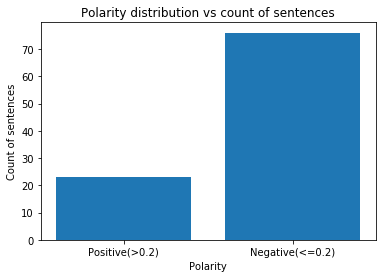

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
labels = ('Positive(>0.2)',"Negative(<=0.2)")
plt.bar(labels,[pol_pos,pol_neg])

plt.xlabel("Polarity")
plt.ylabel("Count of sentences")
plt.title("Polarity distribution vs count of sentences")
    

Text(0.5,1,'Subjectivity distribution vs count of sentences')

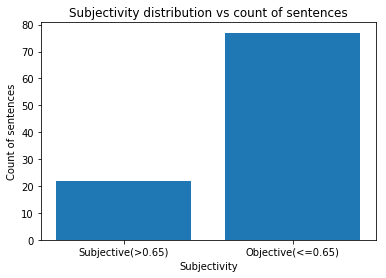

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
labels = ('Subjective(>0.65)',"Objective(<=0.65)")
plt.bar(labels,[sub_pos,sub_neg])

plt.xlabel("Subjectivity")
plt.ylabel("Count of sentences")
plt.title("Subjectivity distribution vs count of sentences")
    